# Harshil Padhiyar

### Data Science & Business Analytics

### GRIP - The Spark Foundation

### Task-2 : Prediction using Unsupervised ML

#### K-means Clustering

Task is  that from the ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.

### Step-1 : Import required libraries

In [1]:
# import libraries

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

### Step-2 : Load Data from CSV File

In [2]:
df = pd.read_csv("iris.csv")
df.head()  # show first five row from csv file

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop(columns = ['Id'])  # drop Id column from dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Step-3 : Finding k value

In [4]:
X = df.iloc[:, [0, 1, 2, 3]].values
k_val = range(1, 8)
sse = []  # sum of squre error

for i in k_val:
    km = KMeans(n_clusters = i)
    km.fit(X)
    sse.append(km.inertia_)


print(sse)  # display sse value

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.317873214285726, 46.535582051282034, 38.930963049671746, 34.2441131402922]


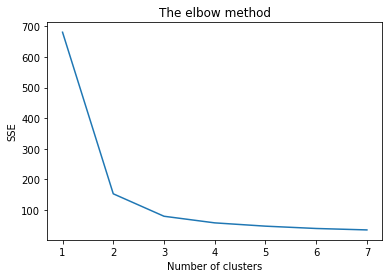

In [5]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(k_val, sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Sum of Squred Error
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within Sum of Squred Error (SSE) doesn't decrease significantly with every iteration.

From this we choose k=3.

### Step-4 : Build a K-Means Model

In [6]:
kmeans = KMeans(n_clusters = 3)  # Put cluster value on basis of elbow method
y_kmeans = kmeans.fit_predict(X)  # fit data into model and predict it

In [7]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Step-5 : Visulize the cluster

#### Plot cluster for Sepal Length and Sepal width

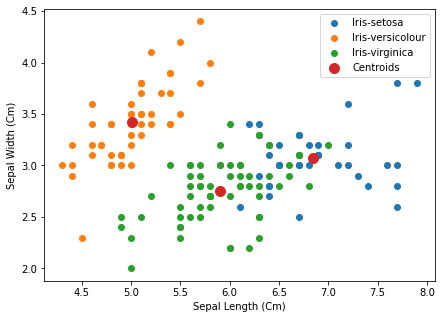

In [8]:
plt.rcParams.update({'figure.figsize':(7,5)})  # set size of scatter plot
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], label = 'Iris-virginica')

plt.rcParams.update({'figure.figsize':(7,5)})
# plotting centroid of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], label = 'Centroids', s=100)
plt.xlabel('Sepal Length (Cm)')
plt.ylabel('Sepal Width (Cm)') 
plt.legend()

#### Plot cluster for Petal Length and Petal width

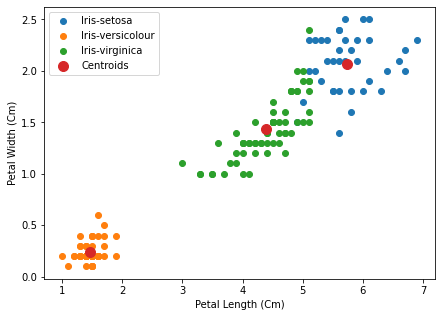

In [9]:
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], label = 'Iris-virginica')

# plotting centroid of each cluster

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], label = 'Centroids', s=100)
plt.xlabel('Petal Length (Cm)')
plt.ylabel('Petal Width (Cm)') 
plt.legend()

###                                                                         Thank You.